In [ ]:
!pip install -U mealpy==3.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.8 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inspect

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from mealpy.swarm_based import PSO
from mealpy import FloatVar, IntegerVar, Problem

In [ ]:
#EKSPLORASI AWAL DATASET
df=pd.read_csv("/content/clean_data_ADASYN_without_outliers.csv")
df.head()

,Seberapa sering Anda merasa kesulitan dalam menyelesaikan tugas kuliah?,Apakah Anda merasa bahwa beban tugas kuliah terlalu memberatkan Anda?,Seberapa sering Anda merasa kelelahan atau stres setelah mengerjakan tugas kuliah?,Apakah Anda merasa bahwa tenggat waktu tugas kuliah yang diberikan cukup realistis?,Seberapa sering Anda merasa khawatir tidak bisa menyelesaikan tugas tepat waktu?,Apakah Anda merasa bahwa beban tugas kuliah mempengaruhi keseimbangan kehidupan dan belajar Anda?,Apakah Anda merasa memiliki dukungan dari teman atau keluarga dalam menghadapi tekanan tugas kuliah?,Bagaimana Anda biasanya mengatasi perasaan stres atau frustrasi akibat tugas kuliah? (pilih yang sesuai),Apakah Anda merasa dukungan dari dosen atau staf kampus cukup membantu dalam menghadapi kesulitan tugas kuliah?,Seberapa sering Anda merasa cemas atau tertekan secara emosional dalam menghadapi tugas kuliah?,Apakah Anda merasa bahwa tekanan dari tugas kuliah mempengaruhi kualitas tidur atau pola tidur Anda?,Apakah tugas kuliah yang diberikan berdampak terhadap kesehatan mental Anda?
0,3,3,3,2,4,3,4,4,4,3,4,2
1,4,4,4,2,4,3,5,2,3,4,4,1
2,3,3,3,3,4,3,3,4,5,3,4,2
3,5,3,1,2,4,3,3,2,4,1,4,2
4,4,3,2,2,2,2,3,2,4,2,3,2


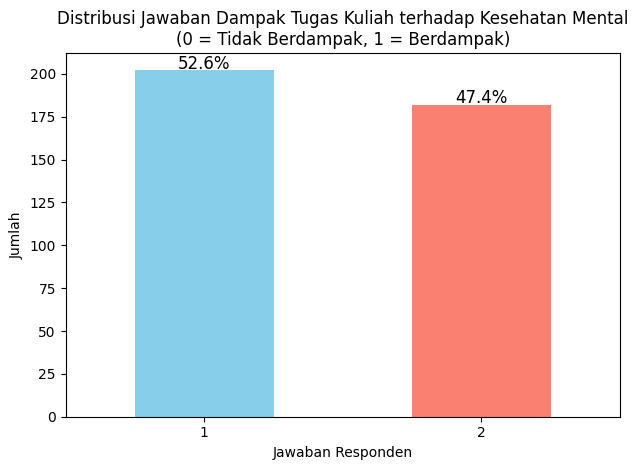

In [ ]:
# Tentukan kolom target secara eksplisit
target_column = 'Apakah tugas kuliah yang diberikan berdampak terhadap kesehatan mental Anda?'

# Hitung jumlah dan persentase tiap kelas
value_counts = df[target_column].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Plot distribusi kelas
ax = value_counts.plot(
    kind='bar',
    title='Distribusi Jawaban Dampak Tugas Kuliah terhadap Kesehatan Mental\n(0 = Tidak Berdampak, 1 = Berdampak)',
    color=['skyblue', 'salmon']
)

# Tambahkan persentase di atas bar
for i, (count, percent) in enumerate(zip(value_counts, percentages)):
    ax.text(i, count + 1, f'{percent:.1f}%', ha='center', fontsize=12)

plt.xlabel('Jawaban Responden')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

INFO:mealpy.swarm_based.PSO.OriginalPSO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 1, Current best: 0.6806980433632999, Global best: 0.6806980433632999, Runtime: 0.38720 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 2, Current best: 0.6806980433632999, Global best: 0.6806980433632999, Runtime: 0.26548 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 3, Current best: 0.6806980433632999, Global best: 0.6806980433632999, Runtime: 0.26879 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 4, Current best: 0.6806980433632999, Global best: 0.6806980433632999, Runtime: 0.26864 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 5, Current best: 0.6806980433632999, Global best: 0.6806980433632999, Runtime: 0.28266 seconds
INFO:mealpy.swarm_based.PSO.OriginalPSO:>>>Problem: P, Epoch: 6, Current best: 0.6806980433632999, Global best: 0.68069804336329

Best Hyperparameters: var_smoothing=1.0836298004138675e-06
Best Accuracy (CV): 0.6807

========= Hasil Pengujian pada Data Uji =========
Akurasi: 67.53%

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.61      0.67        41
           2       0.63      0.75      0.68        36

    accuracy                           0.68        77
   macro avg       0.68      0.68      0.68        77
weighted avg       0.69      0.68      0.67        77


Confusion Matrix:
[[25 16]
 [ 9 27]]


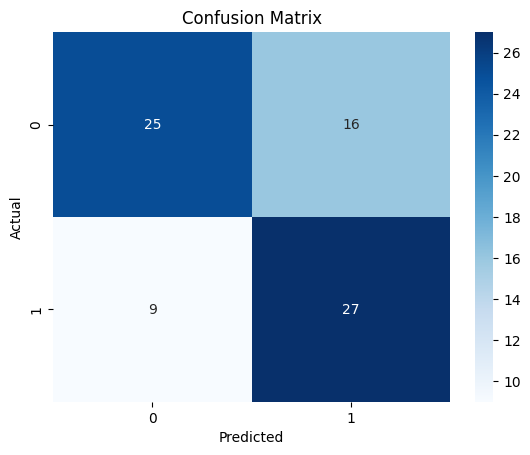

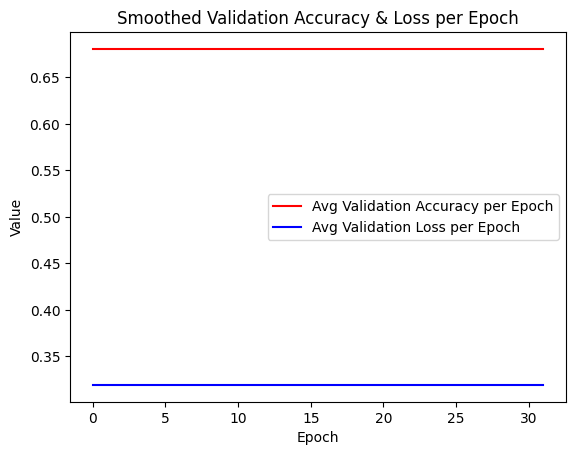

In [ ]:
# 1. Load Dataset
df = pd.read_csv("/content/clean_data_ADASYN_without_outliers.csv")

# 2. Pisahkan fitur dan target
target_column = 'Apakah tugas kuliah yang diberikan berdampak terhadap kesehatan mental Anda?'
X = df.drop(columns=[target_column])
y = df[target_column]

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Definisikan Problem khusus untuk GaussianNB hanya dengan var_smoothing
class NBOptimizedProblem(Problem):
    def __init__(self, bounds=None, minmax="max", data=None, **kwargs):
        self.data = data
        self.validation_accuracy_history = []
        super().__init__(bounds, minmax, **kwargs)

    def obj_func(self, x):
        var_smoothing = x[0]
        X_train_std, y_train = self.data
        model = GaussianNB(var_smoothing=var_smoothing)
        scores = cross_val_score(model, X_train_std, y_train, cv=5)
        val_acc = scores.mean()
        self.validation_accuracy_history.append(val_acc)
        return val_acc

# 6. Batasan parameter untuk var_smoothing
bounds = [
    FloatVar(lb=1e-10, ub=1e-5, name="var_smoothing")
]

# 7. Jalankan PSO
data = [X_train_scaled, y_train]
problem = NBOptimizedProblem(bounds=bounds, minmax="max", data=data)

model = PSO.OriginalPSO(epoch=30, pop_size=20)
model.solve(problem, mode="single")

# 8. Ambil hasil terbaik
best_var_smoothing = model.g_best.solution[0]
print(f"Best Hyperparameters: var_smoothing={best_var_smoothing}")
print(f"Best Accuracy (CV): {model.g_best.target.fitness:.4f}")

# 9. Latih model terbaik
best_nb = GaussianNB(var_smoothing=best_var_smoothing)
best_nb.fit(X_train_scaled, y_train)
y_pred = best_nb.predict(X_test_scaled)

print("\n========= Hasil Pengujian pada Data Uji =========")
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 10. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 11. Grafik Akurasi & Loss per Epoch
validation_accuracy_history = problem.validation_accuracy_history
validation_loss_history = [1 - acc for acc in validation_accuracy_history]
iterations_per_epoch = len(validation_accuracy_history) // model.epoch

def average_per_epoch(loss_list, iter_per_epoch):
    return [np.mean(loss_list[i:i+iter_per_epoch])
            for i in range(0, len(loss_list), iter_per_epoch)]

avg_val_loss = average_per_epoch(validation_loss_history, iterations_per_epoch)
avg_val_acc = average_per_epoch(validation_accuracy_history, iterations_per_epoch)

fig, ax = plt.subplots()
ax.plot(avg_val_acc, label='Avg Validation Accuracy per Epoch', color='red')
ax.plot(avg_val_loss, label='Avg Validation Loss per Epoch', color='blue')
ax.set_title('Smoothed Validation Accuracy & Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')
ax.legend()
ax.grid(False)
plt.show()

# 12. Simpan grafik dari PSO
output_path = "./pso_charts_nb/"
os.makedirs(output_path, exist_ok=True)
model.history.save_global_objectives_chart(filename=output_path + "goc.png")
model.history.save_local_objectives_chart(filename=output_path + "loc.png")
model.history.save_global_best_fitness_chart(filename=output_path + "gbfc.png")
model.history.save_local_best_fitness_chart(filename=output_path + "lbfc.png")
model.history.save_runtime_chart(filename=output_path + "rtc.png")
model.history.save_exploration_exploitation_chart(filename=output_path + "eec.png")
model.history.save_diversity_chart(filename=output_path + "diversity.png")